### Imports

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from datasets import load_dataset

### Load dataset

In [2]:
dataset = load_dataset("clarin-knext/fiqa-pl", 'corpus')
text_series = dataset['corpus'].to_pandas()['text']

### 1. Devise two regular expressions:
- extracting times, e.g. recognizing 20:30 as an instance of a time.
- extracting dates, e.g. recognizing 20 września as an instance of date.

In [3]:
time_pattern = '((([0-1]?[0-9])|(2[0-3])):[0-5][0-9])'
date_pattern = '((0?[1-9]|[1-2][0-9]|3[0-1]) ((stycz|kwieci|sierpi|wrzesi|grudzi)eń|(marz|lipi|czerwi)ec|listopad|październik|luty|maj))'

### 2. Search for occurrences of times and dates in the dataset.


In [4]:
time_matches: pd.Series = text_series.apply(lambda x: re.findall(time_pattern, x))
filtered_time_matches = time_matches[time_matches.apply(lambda x: len(x)>0)]
filtered_time_matches

49       [(17:57, 17, 17, ), (17:57, 17, 17, )]
137                            [(6:17, 6, 6, )]
165      [(20:00, 20, , 20), (17:00, 17, 17, )]
191                         [(22:00, 22, , 22)]
264                         [(12:00, 12, 12, )]
                          ...                  
55860    [(15:04, 15, 15, ), (15:04, 15, 15, )]
55867    [(16:00, 16, 16, ), (16:00, 16, 16, )]
56143                       [(10:17, 10, 10, )]
56348                          [(5:53, 5, 5, )]
56444                       [(06:18, 06, 06, )]
Name: text, Length: 306, dtype: object

In [5]:
date_matches: pd.Series = text_series.apply(lambda x: re.findall(date_pattern, x, re.IGNORECASE))
filtered_date_matches = date_matches[date_matches.apply(lambda x: len(x)>0)]
filtered_date_matches

178      [(4 maj, 4, maj, , ), (17 październik, 17, paź...
569                                  [(6 maj, 6, maj, , )]
742      [(2 listopad, 2, listopad, , ), (21 listopad, ...
802                [(29 październik, 29, październik, , )]
858      [(14 październik, 14, październik, , ), (20 pa...
                               ...                        
56892              [(20 październik, 20, październik, , )]
56905                [(1 październik, 1, październik, , )]
56935              [(16 październik, 16, październik, , )]
57167                [(2 październik, 2, październik, , )]
57570                [(3 październik, 3, październik, , )]
Name: text, Length: 162, dtype: object

### 3. Plot results from point 2:
- for times create a bar plot for full hours.
- for dates create a bar plot for months.

In [6]:
full_hours_dict = defaultdict(lambda: 0)
for match_list in filtered_time_matches:
    for el in match_list:
        full_hours_dict[int(el[0].split(':')[0])] += 1

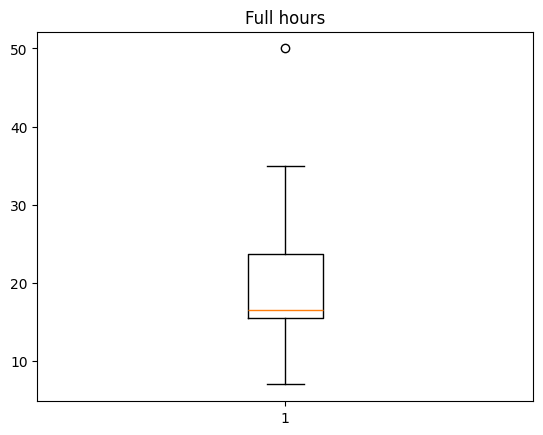

In [7]:
plt.title('Full hours')
plt.boxplot(full_hours_dict.values());

In [8]:
months_dict = defaultdict(lambda: 0)
for match_list in filtered_date_matches:
    for el in match_list:
        months_dict[el[0].split()[1][:3].lower()] += 1


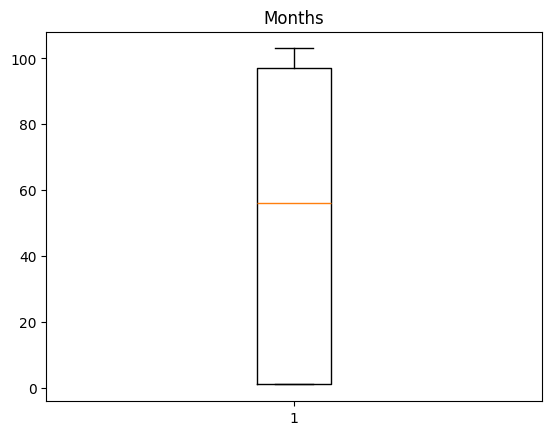

In [9]:
plt.title('Months')
plt.boxplot(months_dict.values());

### 4. Compute the number of occurrences of styczeń word in any inflectional form. Use a compact form for the query (i.e. joining all forms of the word by alternative is forbidden).
### 5. As in 4, but preceded by a number and a space.
### 6. As in 4, but not preceded by a number and a space. Check if the results from 5 and 6 sum to 4.

In [10]:
import regex
def get_texts_matches_count(texts, pattern):
    matches: pd.Series = texts.apply(lambda x: regex.findall(pattern, x, re.IGNORECASE))
    filtered_matches = matches[matches.apply(lambda x: len(x)>0)]
    count = 0
    for match_list in filtered_matches:
        for _ in match_list:
            count += 1
    return count

In [11]:
january_pattern = '(stycz(eń|nia|niem|niowi|niu|ni|ach|ami|nie|niom|niów))'
january_with_number_pattern = '(((0?[1-9]|[1-2][0-9]|3[0-1]) )stycz(eń|nia|niem|niowi|niu|ni|ach|ami|nie|niom|niów))'
january_without_number_pattern =  '((?<!((0?[1-9]|[1-2][0-9]|3[0-1]) ))stycz(eń|nia|niem|niowi|niu|ni|ach|ami|nie|niom|niów))'

In [12]:
c1, c2, c3 = get_texts_matches_count(text_series, january_pattern), get_texts_matches_count(text_series, january_with_number_pattern), get_texts_matches_count(text_series, january_without_number_pattern)

In [13]:
print(f"""
    All january matches:             {c1}
    January with number matches:     {c2}
    January without number matches:  {c3}
    Sum:    {c2} + {c3} = {c1}     -    {c1==c2+c3}""")


    All january matches:             955
    January with number matches:     215
    January without number matches:  740
    Sum:    215 + 740 = 955     -    True


Answer the following questions (2 points):

1. Are regular expressions good at capturing times?
```
Creating regular expression for capturing times is simple and fast. There are not many edge cases so regex are good at capturing times.   
```
2. Are regular expressions good at capturing dates?
```
Dates can have many formats including that ones with month expressed in words. Month names differs between languages and in many languages month names can have multiple forms. It makes dates very difficult to capture correctly using regular expressions.
```
3. How one can be sure that the expression has matched all and only the correct expressions of a given type?
```
Regular expressions should be checked e.g by writing tests that includes potentially difficult texts where the mistake could happen. Tests should cover all edge cases.
```